In [3]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [18]:
data=pd.read_csv("emp_data_decesion_tree.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [19]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [20]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [21]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [22]:
data["BusinessTravel"]

0           Travel_Rarely
1       Travel_Frequently
2           Travel_Rarely
3       Travel_Frequently
4           Travel_Rarely
              ...        
1465    Travel_Frequently
1466        Travel_Rarely
1467        Travel_Rarely
1468    Travel_Frequently
1469        Travel_Rarely
Name: BusinessTravel, Length: 1470, dtype: object

In [24]:
t_map01={"Travel_Rarely":1,"Travel_Frequently":2,"Non-Travel":3}
data["BusinessTravel"]=data["BusinessTravel"].apply(lambda x: t_map01[x])
data["BusinessTravel"]

0       1
1       2
2       1
3       2
4       1
       ..
1465    2
1466    1
1467    1
1468    2
1469    1
Name: BusinessTravel, Length: 1470, dtype: int64

In [25]:
data["Department"]

0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
1465    Research & Development
1466    Research & Development
1467    Research & Development
1468                     Sales
1469    Research & Development
Name: Department, Length: 1470, dtype: object

In [27]:
t_map02={"Sales":1,"Research & Development":2,"Human Resources":3}
data["Department"]=data["Department"].apply(lambda x: t_map02[x])
data["Department"]

0       1
1       2
2       2
3       2
4       2
       ..
1465    2
1466    2
1467    2
1468    1
1469    2
Name: Department, Length: 1470, dtype: int64

In [29]:
data["EducationField"].head(10)

0    Life Sciences
1    Life Sciences
2            Other
3    Life Sciences
4          Medical
5    Life Sciences
6          Medical
7    Life Sciences
8    Life Sciences
9          Medical
Name: EducationField, dtype: object

In [34]:
t_map03={'Life Sciences':1,'Medical':2,'Marketing':3,'Technical Degree':4,'Human Resources':5,'Other':6}
data["EducationField"]=data["EducationField"].apply(lambda x: t_map03[x])
data["EducationField"]

0       1
1       1
2       6
3       1
4       2
       ..
1465    2
1466    2
1467    1
1468    2
1469    2
Name: EducationField, Length: 1470, dtype: int64

In [35]:
data["Gender"]

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1465      Male
1466      Male
1467      Male
1468      Male
1469      Male
Name: Gender, Length: 1470, dtype: object

In [36]:
t_map04={'Female':0,'Male':1}
data["Gender"]=data["Gender"].apply(lambda x:t_map04[x])
data["Gender"]

0       0
1       1
2       1
3       0
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: Gender, Length: 1470, dtype: int64

In [39]:
data['JobRole'].head(30)

0               Sales Executive
1            Research Scientist
2         Laboratory Technician
3            Research Scientist
4         Laboratory Technician
5         Laboratory Technician
6         Laboratory Technician
7         Laboratory Technician
8        Manufacturing Director
9     Healthcare Representative
10        Laboratory Technician
11        Laboratory Technician
12           Research Scientist
13        Laboratory Technician
14        Laboratory Technician
15       Manufacturing Director
16           Research Scientist
17        Laboratory Technician
18                      Manager
19           Research Scientist
20       Manufacturing Director
21         Sales Representative
22            Research Director
23           Research Scientist
24           Research Scientist
25                      Manager
26           Research Scientist
27              Sales Executive
28    Healthcare Representative
29                      Manager
Name: JobRole, dtype: object

In [43]:
t_map05={'Sales Executive':1,'Research Scientist':2,'Laboratory Technician':3,'Manufacturing Director':4,'Healthcare Representative':5,'Manager':6,'Sales Representative':7,'Research Director':8,'Human Resources':9}
data['JobRole']=data['JobRole'].apply(lambda x: t_map05[x])
data['JobRole']

0       1
1       2
2       3
3       2
4       3
       ..
1465    3
1466    5
1467    4
1468    1
1469    3
Name: JobRole, Length: 1470, dtype: int64

In [45]:
data['MaritalStatus']

0        Single
1       Married
2        Single
3       Married
4       Married
         ...   
1465    Married
1466    Married
1467    Married
1468    Married
1469    Married
Name: MaritalStatus, Length: 1470, dtype: object

In [47]:
t_map06={'Single':1,'Married':2,'Divorced':3}
data['MaritalStatus']=data['MaritalStatus'].apply(lambda x : t_map06[x])
data['MaritalStatus']

0       1
1       2
2       1
3       2
4       2
       ..
1465    2
1466    2
1467    2
1468    2
1469    2
Name: MaritalStatus, Length: 1470, dtype: int64

In [50]:
data['Over18']

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1465    Y
1466    Y
1467    Y
1468    Y
1469    Y
Name: Over18, Length: 1470, dtype: object

In [52]:
t_map07={'Y':1}
data['Over18']=data['Over18'].apply(lambda x: t_map07[x])
data['Over18']

0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: Over18, Length: 1470, dtype: int64

In [53]:
data['OverTime']

0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
1465     No
1466     No
1467    Yes
1468     No
1469     No
Name: OverTime, Length: 1470, dtype: object

In [54]:
t_map08={'Yes':1,'No':2}
data['OverTime']=data['OverTime'].apply(lambda x : t_map08[x])
data['OverTime']

0       1
1       2
2       1
3       1
4       2
       ..
1465    2
1466    2
1467    1
1468    2
1469    2
Name: OverTime, Length: 1470, dtype: int64

In [55]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel               int64
DailyRate                    int64
Department                   int64
DistanceFromHome             int64
Education                    int64
EducationField               int64
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                       int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                      int64
JobSatisfaction              int64
MaritalStatus                int64
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                       int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [56]:
X=data.drop(columns='Attrition')
y=data['Attrition']

In [58]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=355)

In [59]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
feature_name=list(X.columns)
class_name=list(y_train.unique())
feature_name

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [61]:
class_name

['No', 'Yes']

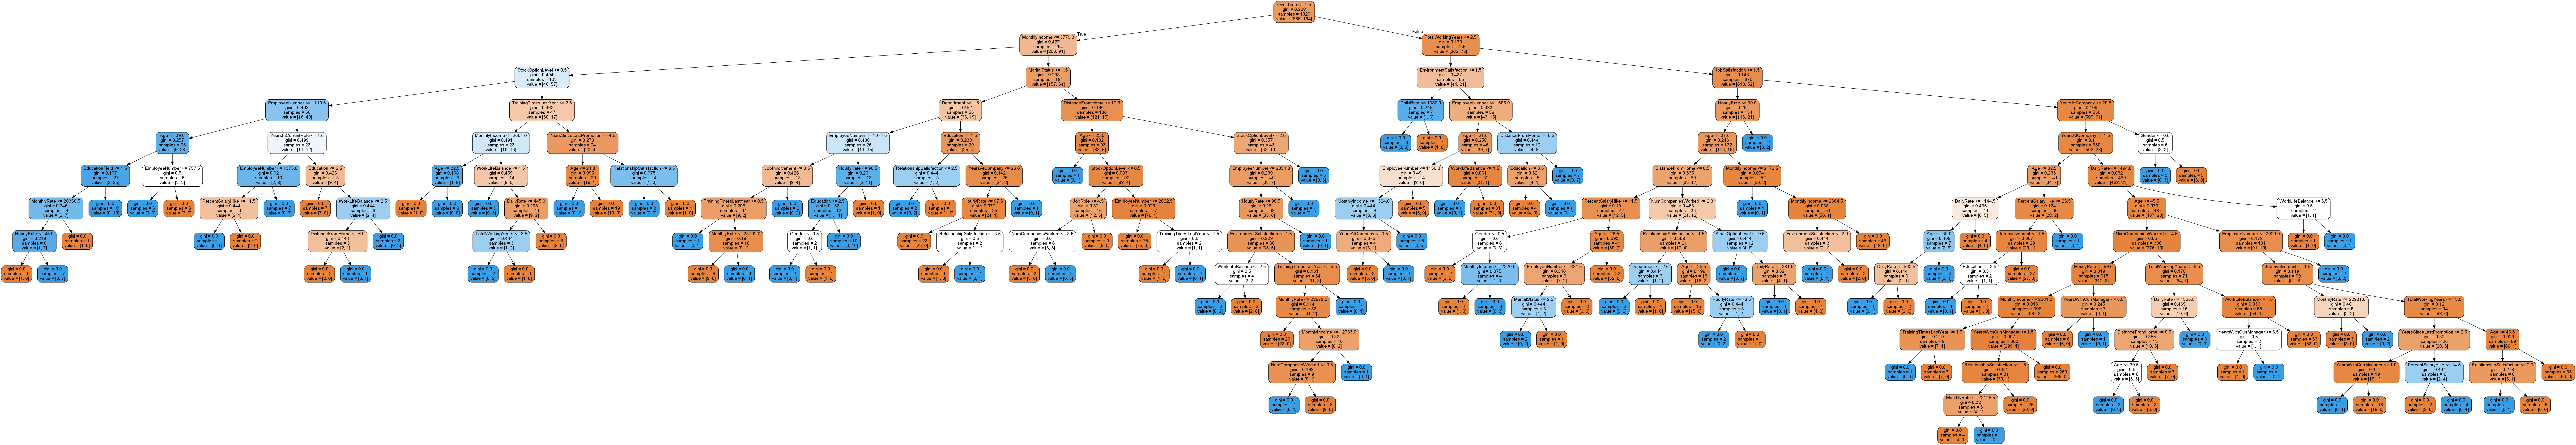

In [62]:
dot_data=export_graphviz(clf,feature_names=feature_name,rounded=True,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png('asighnmentTree01.png')
Image(graph.create_png())

In [63]:
clf.score(x_train,y_train)

1.0

In [65]:
py_pred=clf.predict(x_test)
py_pred

array(['No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No',

In [66]:
clf.score(x_test,y_test)

0.7913832199546486

Now we should consider hyper parameters

In [67]:
scalar=StandardScaler()
x_transform=scalar.fit_transform(X)

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x_transform,y,test_size=0.30,random_state=355)

In [70]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

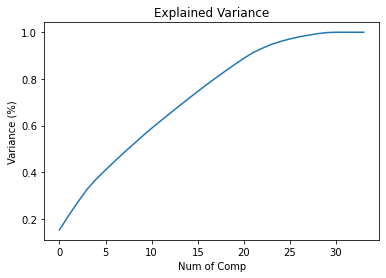

In [71]:
pca=PCA()
principalcomp=pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Num of Comp")
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

Here n_components should be 25 

In [74]:
pca=PCA(n_components=25)
new_data=pca.fit_transform(x_transform)

In [79]:
principal_x=pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20','PC-21','PC-22','PC-23','PC-24','PC-25'])
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-16,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,PC-25
0,-0.490963,0.655581,-1.052722,-1.352747,-2.837654,1.448306,-2.221242,-0.649766,0.642847,2.005262,...,-1.088186,-0.715704,-0.545564,1.155894,0.542991,0.924868,1.426182,0.475717,-0.912683,0.481360
1,0.509520,-1.698893,2.870087,-0.408696,0.397105,1.151954,0.275650,-0.541093,0.577022,-0.025507,...,1.102492,-1.035729,0.877565,0.315918,0.584017,-0.189201,0.300841,-1.970122,-0.274574,0.185296
2,-2.536739,1.249155,-0.281668,-1.301289,0.305440,1.203896,-0.489525,1.037293,-2.674513,-0.403841,...,-0.421028,0.489623,0.992610,1.507526,0.846185,-0.291763,1.998024,0.032022,0.251349,-0.009226
3,-0.921935,-0.454576,-1.310774,-0.352972,-0.329857,2.086181,-0.917857,0.235324,-0.631222,0.875326,...,-1.359500,0.213312,0.026463,0.893568,0.039134,-1.579631,-0.501918,-0.022599,0.440455,-0.358943
4,-1.893769,0.976999,-0.730477,-0.014354,0.497527,0.416861,-0.757935,-1.275281,-0.934959,-0.555325,...,0.976246,-1.899773,-0.091165,-0.629222,-0.896892,0.317373,2.246702,1.011545,-0.394348,-0.369052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.792692,0.456973,0.293839,0.601843,0.177058,0.056923,-0.159457,0.308940,1.091030,-1.267746,...,0.412901,0.105865,-0.540808,-1.813127,0.036490,0.888822,1.149247,-0.541118,-0.174243,-0.264247
1466,0.903081,0.169812,-0.303817,0.208653,1.564360,-0.597592,2.939982,-0.414267,0.088288,0.951540,...,1.542866,-0.468783,0.033354,-0.980371,-0.268484,-0.704658,1.177030,-0.290040,-0.895056,0.061556
1467,-1.221075,-0.440757,2.485296,0.289382,0.631773,-1.355738,-0.954338,1.694495,0.606800,0.343947,...,-0.906799,1.516069,-1.936049,-0.920373,0.053631,0.056063,-0.605264,0.417931,-0.352484,-0.565464
1468,0.801734,-0.544969,-0.950243,-0.239216,-1.307618,-0.112241,0.342342,0.346731,0.180584,-1.035157,...,1.671114,0.735955,-0.245218,0.023469,-0.668946,0.430955,-0.823463,-1.700032,-0.595494,0.842310


In [81]:
x_train,x_test,y_train,y_test=train_test_split(principal_x,y,test_size=0.30,random_state=355)
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7913832199546486

Let's now try to tune some hyperparameters using the GridSearchCV algorithm

In [82]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [83]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)

In [84]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [85]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'random'}


In [86]:
grid_search.best_score_

0.8503623016812693

In [87]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=3,min_samples_split=3,splitter='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=3,
                       splitter='random')

In [89]:
clf.score(x_test,y_test)

0.8344671201814059

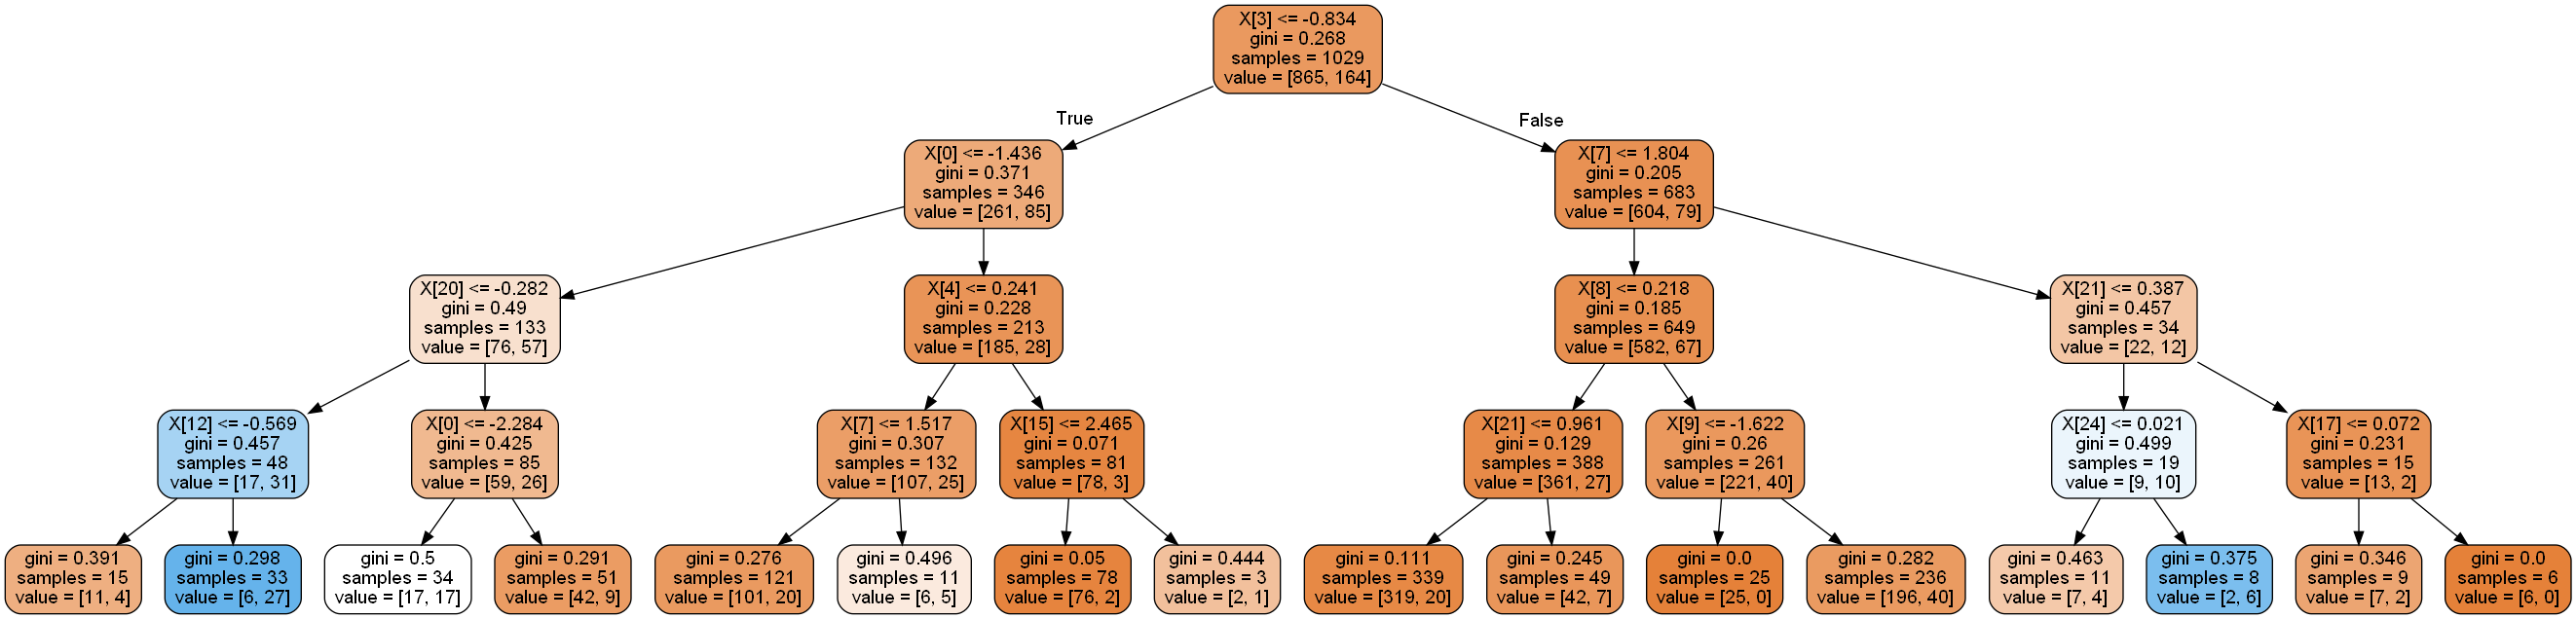

In [91]:
feature_name=list(X.columns)
class_name=list(y_train.unique())
dot_data=export_graphviz(clf,rounded=True,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png('AsignmentFinalTree.png')
Image(graph.create_png())

In [93]:
import pickle
filename="Assignment.pickle"
pickle.dump(clf,open(filename,"wb"))